<a href="https://colab.research.google.com/github/jafetgabes/DSA-/blob/main/Recommendation_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
product_descriptions = pd.read_csv("sample_data/product_descriptions.csv")
product_descriptions.shape

NameError: ignored

In [41]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [42]:
product_descriptions1 = product_descriptions.head(50)
# product_descriptions1.iloc[:,1]
product_descriptions1["product_description"].head()


0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
Name: product_description, dtype: object

In [43]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<50x2032 sparse matrix of type '<class 'numpy.float64'>'
	with 3455 stored elements in Compressed Sparse Row format>

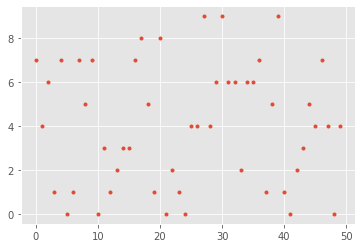

In [44]:

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [45]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [46]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 radiant
 insulation
 97
 cooling
 acoustical
 barrier
 heating
 excellent
 natural
 energy
Cluster 1:
 cooking
 heat
 surface
 sensor
 energy
 vent
 roof
 automatic
 stove
 star
Cluster 2:
 post
 ladder
 fence
 privacy
 ft
 model
 reed
 spray
 series
 water
Cluster 3:
 primed
 ft
 match
 painted
 bronze
 collection
 base
 room
 includes
 behr
Cluster 4:
 led
 switch
 power
 light
 solar
 wall
 watt
 free
 refrigerators
 storage
Cluster 5:
 wall
 bracket
 finish
 clock
 home
 shelf
 storage
 paint
 smooth
 decor
Cluster 6:
 concrete
 plastic
 step
 folding
 cement
 masonry
 sprinkler
 non
 lb
 head
Cluster 7:
 shade
 grill
 bamboo
 natural
 patio
 wicker
 sturdy
 gazebo
 make
 clip
Cluster 8:
 stakes
 edgings
 valley
 recommended
 view
 used
 anchor
 brick
 designs
 paver
Cluster 9:
 metal
 36
 cloverleaf
 repair
 expanded
 cut
 pockets
 tape
 loops
 pouch


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [55]:
show_recommendations("steel drill")

Cluster 9:
 metal
 36
 cloverleaf
 repair
 expanded
 cut
 pockets
 tape
 loops
 pouch


In [56]:
show_recommendations("spray paint")

Cluster 2:
 post
 ladder
 fence
 privacy
 ft
 model
 reed
 spray
 series
 water
